In [194]:
import os
import pandas as pd

# Klasör yolu
folder_path = "data/processed_csv_files"  # CSV dosyalarının bulunduğu klasör

# Tüm veriler için birleşik DataFrame
final_df = pd.DataFrame()
# Klasördeki tüm CSV dosyalarını döngüyle işleme
for file_name in os.listdir(folder_path):

    # Dosya adı parçalama
    parts = file_name.split(",")
    crime_type = parts[0].strip()  # Suç türü
    metric_type = parts[1].replace(".csv", "").strip()  # "number" veya "per100k"

    # CSV dosyasını yükleme
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # Yıl sütununu uzun formata (long format) dönüştürme
    df_long = pd.melt(
        df, 
        id_vars=["Country"], 
        var_name="Year", 
        value_name=f"{crime_type} ({metric_type})"
    )

    # Yıl sütununu sayısal hale getir
    df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")

    # Birleştirme
    if final_df.empty:
        final_df = df_long  # İlk dosya için başlangıç DataFrame
    else:
        final_df = pd.merge(final_df, df_long, on=["Country", "Year"], how="outer")
 
    
# İlk iki sütunu sabit tutarak, diğer sütunlarda tüm hücreleri NaN olan satırları kaldır
final_df = final_df[~final_df.iloc[:, 2:].isna().all(axis=1)]
final_df



,Country,Year,Acts against computer systems (number),Acts against computer systems (per100k),Attempted intentional homicide (number),Attempted intentional homicide (per100k),Bribery (number),Bribery (per100k),Burglary of private residential premises (number),Burglary of private residential premises (per100k),...,Sexual exploitation (number),Sexual exploitation (per100k),Sexual violence (number),Sexual violence (per100k),Theft of a motorized vehicle or parts thereof (number),Theft of a motorized vehicle or parts thereof (per100k),Theft (number),Theft (per100k),Unlawful acts involving controlled drugs or precursors (number),Unlawful acts involving controlled drugs or precursors (per100k)
0,Albania,2008,NaN,NaN,242.0,7.63,NaN,NaN,697.0,21.99,...,NaN,NaN,57.0,1.80,398.0,12.56,3596.0,100.88,653.0,20.60
1,Albania,2009,NaN,NaN,231.0,7.25,NaN,NaN,757.0,23.77,...,NaN,NaN,63.0,1.98,504.0,15.83,3577.0,96.49,647.0,20.32
2,Albania,2010,NaN,NaN,211.0,NaN,NaN,NaN,957.0,NaN,...,NaN,NaN,60.0,NaN,627.0,NaN,3978.0,NaN,603.0,NaN
3,Albania,2011,NaN,NaN,214.0,7.56,NaN,NaN,979.0,34.57,...,NaN,NaN,44.0,1.55,611.0,21.58,4621.0,163.19,740.0,26.13
4,Albania,2012,NaN,NaN,220.0,NaN,NaN,NaN,1238.0,NaN,...,NaN,NaN,47.0,NaN,677.0,NaN,5344.0,NaN,1105.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Türkiye,2018,NaN,NaN,NaN,NaN,NaN,NaN,74140.0,91.75,...,NaN,NaN,NaN,NaN,36685.0,45.40,250668.0,310.19,NaN,NaN
611,Türkiye,2019,NaN,NaN,NaN,NaN,NaN,NaN,62842.0,76.63,...,NaN,NaN,NaN,NaN,28437.0,34.68,216670.0,264.22,NaN,NaN
612,Türkiye,2020,NaN,NaN,NaN,NaN,NaN,NaN,58400.0,70.23,...,NaN,NaN,NaN,NaN,32509.0,39.09,198115.0,238.25,NaN,NaN
613,Türkiye,2021,NaN,NaN,NaN,NaN,NaN,NaN,56476.0,67.54,...,NaN,NaN,NaN,NaN,33161.0,39.66,210246.0,251.45,NaN,NaN


In [195]:
# Tüm suç türlerinin toplamını ekle
# Number metrikli toplam
final_df["Burglary (per100k)"] = final_df["Burglary (per100k)"].combine_first(final_df["Burglary of private residential premises (per100k)"])
final_df.drop(columns=["Burglary of private residential premises (per100k)"], inplace=True)
final_df["Burglary (number)"] = final_df["Burglary (number)"].combine_first(final_df["Burglary of private residential premises (number)"])
final_df.drop(columns=["Burglary of private residential premises (number)"], inplace=True)
final_df.drop(columns=["Serious assault (number)"], inplace=True)
final_df.drop(columns=["Serious assault (per100k)"], inplace=True)
final_df.drop(columns=["Sexual assault (number)"], inplace=True)
final_df.drop(columns=["Sexual assault (per100k)"], inplace=True)
final_df.drop(columns=["Rape (number)"], inplace=True)
final_df.drop(columns=["Rape (per100k)"], inplace=True)
final_df.drop(columns=["Theft of a motorized vehicle or parts thereof (number)"], inplace=True)
final_df.drop(columns=["Theft of a motorized vehicle or parts thereof (per100k)"], inplace=True)


final_df["Total Crimes number"] = final_df.filter(like="(number)").sum(axis=1, skipna=True)


# Per 100k metrikli toplam
final_df["Total Crimes per100k"] = final_df.filter(like="(per100k)").sum(axis=1, skipna=True)


# Sütunları yeniden sıralama
number_columns = final_df.filter(like="(number)").columns.tolist()  # Tüm number sütunları
per100k_columns = final_df.filter(like="(per100k)").columns.tolist()  # Tüm per100k sütunları

final_df = final_df[["Country", "Year"] + number_columns + ["Total Crimes number"] + per100k_columns + ["Total Crimes per100k"]]



output_file = "final_crime_data_with_totals_ordered.csv"
final_df.to_csv(output_file, index=False)

print(f"Birleştirilmiş ve sıralanmış veriler {output_file} dosyasına kaydedildi.")

Birleştirilmiş ve sıralanmış veriler final_crime_data_with_totals_ordered.csv dosyasına kaydedildi.


In [196]:


final_df

,Country,Year,Acts against computer systems (number),Attempted intentional homicide (number),Bribery (number),Burglary (number),Child pornography (number),Corruption (number),Fraud (number),Intentional homicide (number),...,Intentional homicide (per100k),Kidnapping (per100k),Money laundering (per100k),Participation in an organized criminal group (per100k),Robbery (per100k),Sexual exploitation (per100k),Sexual violence (per100k),Theft (per100k),Unlawful acts involving controlled drugs or precursors (per100k),Total Crimes per100k
0,Albania,2008,NaN,242.0,NaN,144.0,NaN,NaN,NaN,88.0,...,2.78,0.32,NaN,NaN,4.54,NaN,1.80,100.88,20.60,143.09
1,Albania,2009,NaN,231.0,NaN,169.0,NaN,NaN,NaN,82.0,...,2.57,0.16,NaN,NaN,5.31,NaN,1.98,96.49,20.32,139.39
2,Albania,2010,NaN,211.0,NaN,231.0,NaN,NaN,NaN,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,Albania,2011,NaN,214.0,NaN,265.0,NaN,NaN,NaN,124.0,...,4.38,0.07,NaN,NaN,9.46,NaN,1.55,163.19,26.13,221.70
4,Albania,2012,NaN,220.0,NaN,322.0,NaN,NaN,NaN,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Türkiye,2018,NaN,NaN,NaN,120400.0,NaN,NaN,NaN,1960.0,...,2.43,NaN,NaN,NaN,13.60,NaN,NaN,310.19,NaN,475.21
611,Türkiye,2019,NaN,NaN,NaN,103663.0,NaN,NaN,NaN,1839.0,...,2.24,NaN,NaN,NaN,13.29,NaN,NaN,264.22,NaN,406.16
612,Türkiye,2020,NaN,NaN,NaN,95767.0,NaN,NaN,NaN,1962.0,...,2.36,NaN,NaN,NaN,13.52,NaN,NaN,238.25,NaN,369.30
613,Türkiye,2021,NaN,NaN,NaN,95471.0,NaN,NaN,NaN,1967.0,...,2.35,NaN,NaN,NaN,15.82,NaN,NaN,251.45,NaN,383.80


In [197]:
migration_df = pd.read_csv("data/imigration.csv", sep=";", decimal=",", thousands=".")



In [198]:
import pandas as pd


# Sütunları sayısal türe dönüştür
for col in migration_df.columns[1:]:  # Country hariç diğer sütunlar
    migration_df[col] = pd.to_numeric(migration_df[col], errors='coerce')

# Uzun formata dönüştür
migration_long = pd.melt(
    migration_df,
    id_vars=["Country"],
    var_name="Year",
    value_name="Migration Data"
)

# Year sütununu sayısal türe dönüştür
migration_long["Year"] = pd.to_numeric(migration_long["Year"])

# Suç verilerini yükleyin (örneğin, crime_df)
# crime_df = pd.read_csv("path_to_crime_file.csv")  # Eğer CSV dosyasından yükleniyorsa

# İki DataFrame'i birleştirme
merged_df = pd.merge(
    final_df,
    migration_long,
    on=["Country", "Year"],
    how="inner"  # Ortak ülke ve yıl bilgileri olanları eşleştir
)

# Birleştirilmiş DataFrame'i kaydet
output_file = "merged_crime_migration_data.csv"

merged_df.to_csv(output_file, index=False)
merged_df.to_excel("merged_crime_migration_data.xlsx", index=False)

print(f"Birleştirilmiş veri {output_file} dosyasına kaydedildi.")
merged_df


Birleştirilmiş veri merged_crime_migration_data.csv dosyasına kaydedildi.


,Country,Year,Acts against computer systems (number),Attempted intentional homicide (number),Bribery (number),Burglary (number),Child pornography (number),Corruption (number),Fraud (number),Intentional homicide (number),...,Kidnapping (per100k),Money laundering (per100k),Participation in an organized criminal group (per100k),Robbery (per100k),Sexual exploitation (per100k),Sexual violence (per100k),Theft (per100k),Unlawful acts involving controlled drugs or precursors (per100k),Total Crimes per100k,Migration Data
0,Austria,2012,NaN,109.0,NaN,85238.0,NaN,NaN,NaN,88.0,...,0.13,NaN,NaN,48.67,NaN,48.05,1742.60,23.67,2879.23,125605.0
1,Austria,2013,NaN,105.0,NaN,88703.0,NaN,NaN,NaN,63.0,...,0.05,NaN,NaN,44.22,NaN,44.72,1822.11,322.19,3284.79,135228.0
2,Austria,2014,NaN,70.0,NaN,85487.0,NaN,NaN,NaN,43.0,...,0.01,NaN,NaN,40.92,NaN,41.90,1742.86,342.83,3174.76,154260.0
3,Austria,2015,NaN,96.0,NaN,79152.0,NaN,NaN,NaN,42.0,...,0.03,NaN,NaN,39.79,NaN,40.57,1635.37,385.72,3026.01,198658.0
4,Austria,2016,13103.0,99.0,20.0,80503.0,685.0,3151.0,32543.0,49.0,...,0.02,6.46,0.66,35.66,9.6,50.53,1651.67,416.97,3668.61,158746.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Türkiye,2018,NaN,NaN,NaN,120400.0,NaN,NaN,NaN,1960.0,...,NaN,NaN,NaN,13.60,NaN,NaN,310.19,NaN,475.21,466890.0
268,Türkiye,2019,NaN,NaN,NaN,103663.0,NaN,NaN,NaN,1839.0,...,NaN,NaN,NaN,13.29,NaN,NaN,264.22,NaN,406.16,578488.0
269,Türkiye,2020,NaN,NaN,NaN,95767.0,NaN,NaN,NaN,1962.0,...,NaN,NaN,NaN,13.52,NaN,NaN,238.25,NaN,369.30,242496.0
270,Türkiye,2021,NaN,NaN,NaN,95471.0,NaN,NaN,NaN,1967.0,...,NaN,NaN,NaN,15.82,NaN,NaN,251.45,NaN,383.80,615095.0


Veri Özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 37 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           272 non-null    object 
 1   Year                                                              272 non-null    int64  
 2   Acts against computer systems (number)                            122 non-null    float64
 3   Attempted intentional homicide (number)                           244 non-null    float64
 4   Bribery (number)                                                  139 non-null    float64
 5   Burglary (number)                                                 255 non-null    float64
 6   Child pornography (number)                                        119 non-null    float64
 7   Corruption (number)    

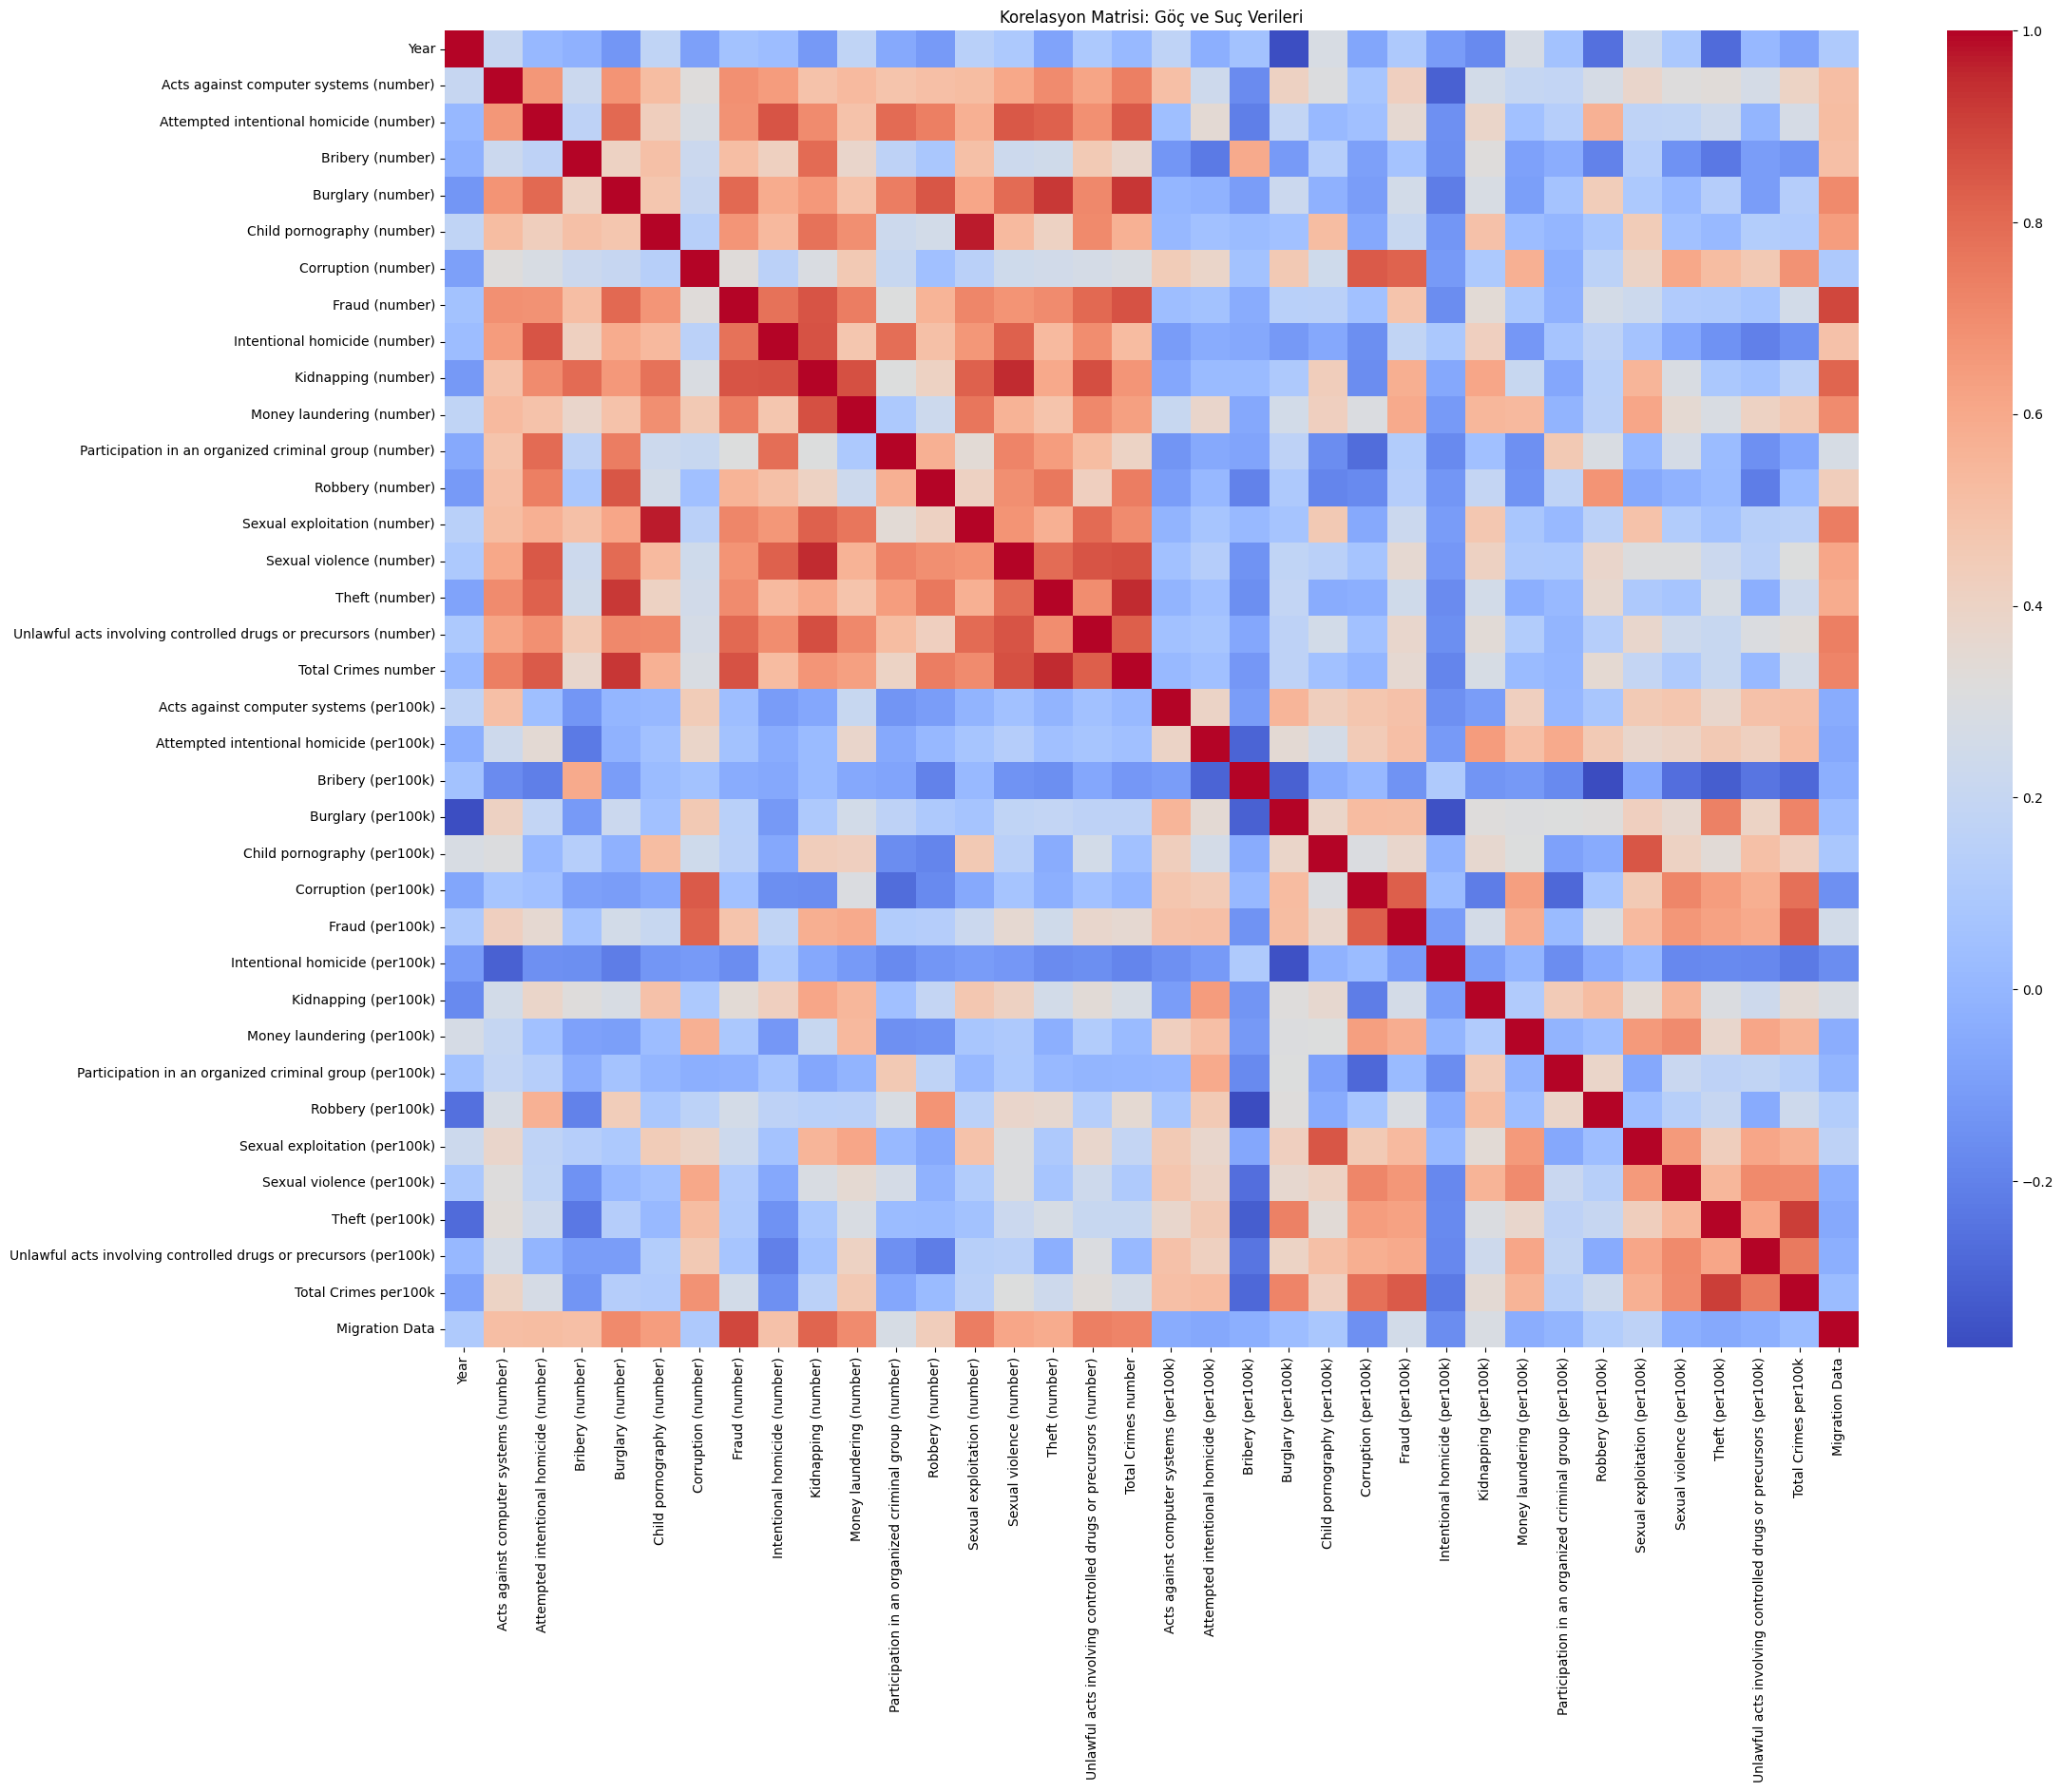

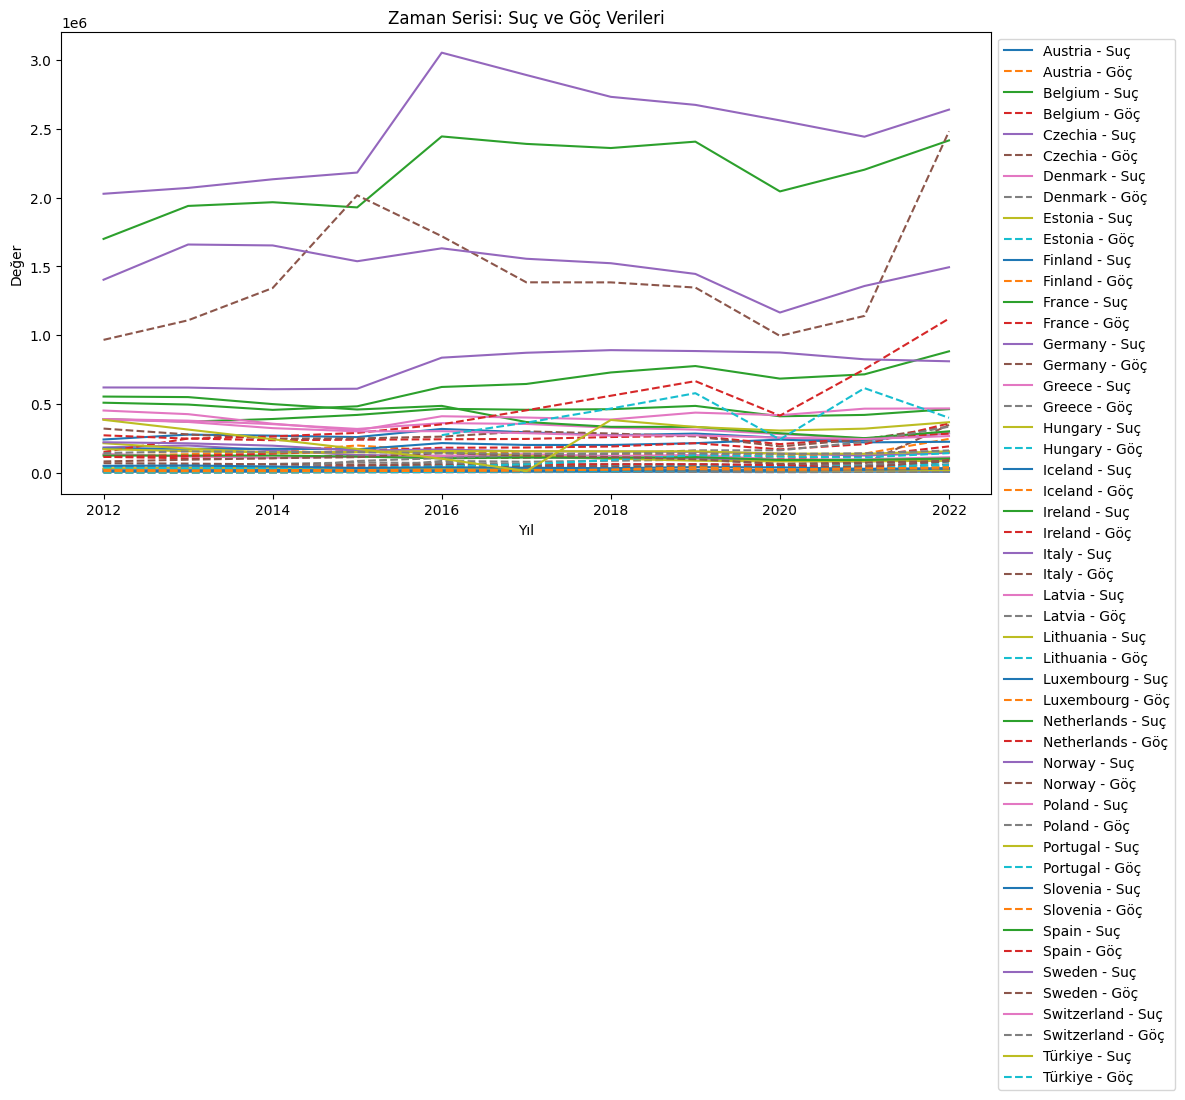

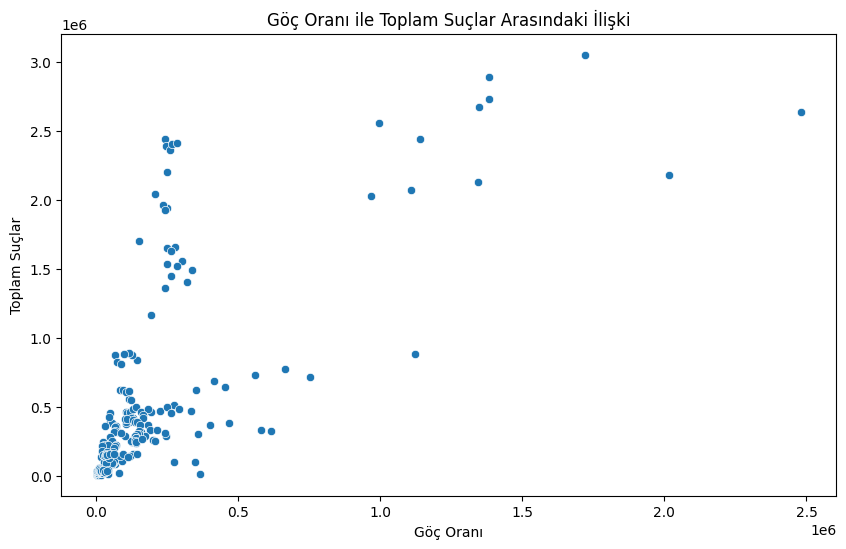

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri Özeti
print("Veri Özeti:")
print(merged_df.info())
print("\nEksik Değerler:")
print(merged_df.isnull().sum())

# Sayısal sütunların temel istatistikleri
print("\nSayısal Sütunların Temel İstatistikleri:")
print(merged_df.describe())

# Korelasyon Matrisi
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

print("\nKorelasyon Matrisi:")
print(correlation_matrix)

# Korelasyon Matrisi Görselleştirme
plt.figure(figsize=(24, 18
                    ))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi: Göç ve Suç Verileri")
plt.show()

# Zaman Serisi Görselleştirme (Örnek: Toplam Suçlar ve Göç)
plt.figure(figsize=(12, 6))
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total Crimes number'], label=f"{country} - Suç")
    plt.plot(country_data['Year'], country_data['Migration Data'], label=f"{country} - Göç", linestyle="--")
plt.title("Zaman Serisi: Suç ve Göç Verileri")
plt.xlabel("Yıl")
plt.ylabel("Değer")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Scatter Plot: Göç Oranı ile Suçlar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Migration Data', y='Total Crimes number', data=merged_df)
plt.title("Göç Oranı ile Toplam Suçlar Arasındaki İlişki")
plt.xlabel("Göç Oranı")
plt.ylabel("Toplam Suçlar")
plt.show()


En yüksek korelasyonlu ülkeler: ['Spain', 'Luxembourg', 'France']


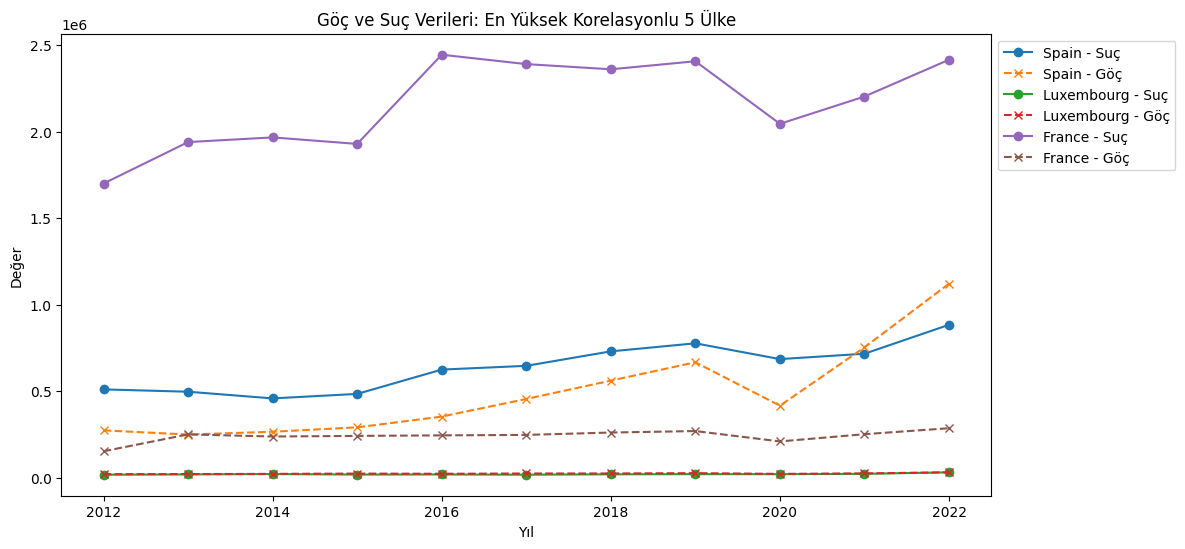

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ülke bazında korelasyon hesaplama
correlations = {}
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    if len(country_data) > 1:  # En az iki veri noktası olması gerekir
        correlation = country_data['Migration Data'].corr(country_data['Total Crimes number'])
        correlations[country] = correlation

# En yüksek korelasyonlu 5 ülkeyi seçme
top_5_countries = sorted(correlations, key=correlations.get, reverse=True)[:3]
print("En yüksek korelasyonlu ülkeler:", top_5_countries)

# Grafik Çizimi
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total Crimes number'], label=f"{country} - Suç", marker='o')
    plt.plot(country_data['Year'], country_data['Migration Data'], label=f"{country} - Göç", linestyle="--", marker='x')
plt.title("Göç ve Suç Verileri: En Yüksek Korelasyonlu 5 Ülke")
plt.xlabel("Yıl")
plt.ylabel("Değer")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


In [201]:
correlations = {}

# Her ülke için korelasyonu hesapla
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    if len(country_data) > 1:  # En az iki veri noktası olmalı
        corr = country_data['Migration Data'].corr(country_data['Total Crimes number'])
        correlations[country] = corr

# Korelasyonları büyükten küçüğe sıralama
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Sıralanmış korelasyonları yazdır
print("Ülke Bazında Korelasyonlar (Büyükten Küçüğe):")
for country, corr_value in sorted_correlations:
    print(f"{country}: {corr_value}")


Ülke Bazında Korelasyonlar (Büyükten Küçüğe):
Spain: 0.9121892792282751
Luxembourg: 0.8152333646646146
France: 0.7532470373129473
Poland: 0.5357325022390627
Norway: 0.5062541832541808
Finland: 0.4514483312772663
Türkiye: 0.45054770634384883
Belgium: 0.4022587281134916
Italy: 0.40013690024429693
Switzerland: 0.30361005858590245
Germany: 0.28395177435082775
Austria: 0.26765111135687614
Greece: 0.2643045104260402
Iceland: 0.2178660362210856
Sweden: 0.05540113588386872
Denmark: -0.2047101158431837
Ireland: -0.3044107693923807
Czechia: -0.35006001408088727
Portugal: -0.3841414101877288
Slovenia: -0.5277788866887874
Estonia: -0.5576161257332556
Lithuania: -0.6078603016230428
Netherlands: -0.6577809946608504
Latvia: -0.6932680131283614
Hungary: -0.9091719766937318


In [202]:
correlations_by_crime = {}

# Sadece "number" metrikli suç türlerini seç
crime_columns = [col for col in merged_df.columns if "(number)" in col]

# Her suç türü için korelasyonu hesapla
for crime in crime_columns:
    corr = merged_df[crime].corr(merged_df['Migration Data'])
    correlations_by_crime[crime] = corr

# Korelasyonları büyükten küçüğe sıralama
sorted_crime_correlations = sorted(correlations_by_crime.items(), key=lambda x: x[1], reverse=True)

# Sıralanmış korelasyonları yazdır
print("Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):")
for crime, corr_value in sorted_crime_correlations:
    print(f"{crime}: {corr_value}")


Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):
Fraud (number): 0.8895521171049194
Kidnapping (number): 0.8149204426559269
Sexual exploitation (number): 0.7477655037135973
Unlawful acts involving controlled drugs or precursors (number): 0.7379106552443898
Burglary (number): 0.7061768527202692
Money laundering (number): 0.7046864963534232
Child pornography (number): 0.6412722410654397
Sexual violence (number): 0.6103915708319239
Theft (number): 0.5884045138214838
Attempted intentional homicide (number): 0.5205810547658161
Acts against computer systems (number): 0.5139043668011993
Bribery (number): 0.5090938195675319
Intentional homicide (number): 0.4975847994231903
Robbery (number): 0.4363989171371874
Participation in an organized criminal group (number): 0.278897717321279
Corruption (number): 0.09959497446920089


In [205]:
# Avrupa bazında toplam değerler hesapla
europe_total = merged_df.groupby("Year").sum(numeric_only=True)
# make zeros nan
europe_total = europe_total.replace(0, pd.NA)
europe_total



,Acts against computer systems (number),Attempted intentional homicide (number),Bribery (number),Burglary (number),Child pornography (number),Corruption (number),Fraud (number),Intentional homicide (number),Kidnapping (number),Money laundering (number),...,Kidnapping (per100k),Money laundering (per100k),Participation in an organized criminal group (per100k),Robbery (per100k),Sexual exploitation (per100k),Sexual violence (per100k),Theft (per100k),Unlawful acts involving controlled drugs or precursors (per100k),Total Crimes per100k,Migration Data
Year,,,,,,,,,,,,,,,,,,,,,
2012,<NA>,12109.0,<NA>,2353409.0,<NA>,<NA>,<NA>,6000.0,24084.0,<NA>,...,63.93,<NA>,<NA>,1878.22,<NA>,856.39,44074.61,7010.54,67886.89,2669310.0
2013,<NA>,11283.0,<NA>,2222757.0,<NA>,<NA>,<NA>,4154.0,10533.0,<NA>,...,43.83,<NA>,<NA>,1767.17,<NA>,1135.17,43610.35,7616.87,67330.00,2890014.0
2014,<NA>,8363.0,<NA>,2132829.0,<NA>,<NA>,<NA>,3986.0,10787.0,<NA>,...,41.09,<NA>,<NA>,1543.20,<NA>,978.12,41089.31,8027.31,64102.62,3152299.0
2015,<NA>,8676.0,<NA>,2031117.0,<NA>,<NA>,<NA>,4182.0,11467.0,<NA>,...,43.01,<NA>,<NA>,1424.15,<NA>,983.46,38619.05,7930.62,59842.70,4024281.0
2016,55906.0,9142.0,17273.0,1870516.0,11529.0,98459.0,2233195.0,3778.0,11009.0,22773.0,...,39.69,103.17,27.83,1332.96,159.61,1071.45,35906.66,8026.91,67498.61,4154595.0
2017,65377.0,9429.0,11915.0,1687478.0,23993.0,71608.0,2157319.0,3740.0,6990.0,21941.0,...,32.28,112.0,23.56,1244.59,234.32,1104.11,34283.41,8172.35,64659.01,4066848.0
2018,68582.0,9750.0,17527.0,1693146.0,25445.0,71993.0,2243151.0,5506.0,5771.0,25970.0,...,20.72,195.25,21.39,1180.66,236.79,1168.90,32060.94,8226.62,63074.40,4357615.0
2019,86246.0,9952.0,10518.0,1597300.0,43053.0,67521.0,2415205.0,5236.0,5835.0,30880.0,...,23.21,276.62,19.92,1173.75,353.36,1215.94,31658.82,8526.39,63375.86,4653128.0
2020,99770.0,10623.0,13500.0,1379655.0,44636.0,65327.0,2543386.0,5455.0,5803.0,39415.0,...,22.01,379.81,23.94,980.96,351.75,1164.36,27228.48,8289.79,58152.46,3341443.0


Avrupa Bazında Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):
Sexual violence (number): 0.807955311664858
Money laundering (number): 0.699598938324014
Unlawful acts involving controlled drugs or precursors (number): 0.6529907757739858
Acts against computer systems (number): 0.6398387666373376
Fraud (number): 0.573032576062344
Sexual exploitation (number): 0.5414640336487381
Intentional homicide (number): 0.2582470329559292
Child pornography (number): 0.0887657159981072
Attempted intentional homicide (number): 0.062337296238505785
Participation in an organized criminal group (number): 0.04444608386591299
Corruption (number): -0.30301929985997056
Bribery (number): -0.3500665940687487
Theft (number): -0.4286504135219648
Kidnapping (number): -0.5516841720851422
Robbery (number): -0.6130375592576561
Burglary (number): -0.6505750609308072


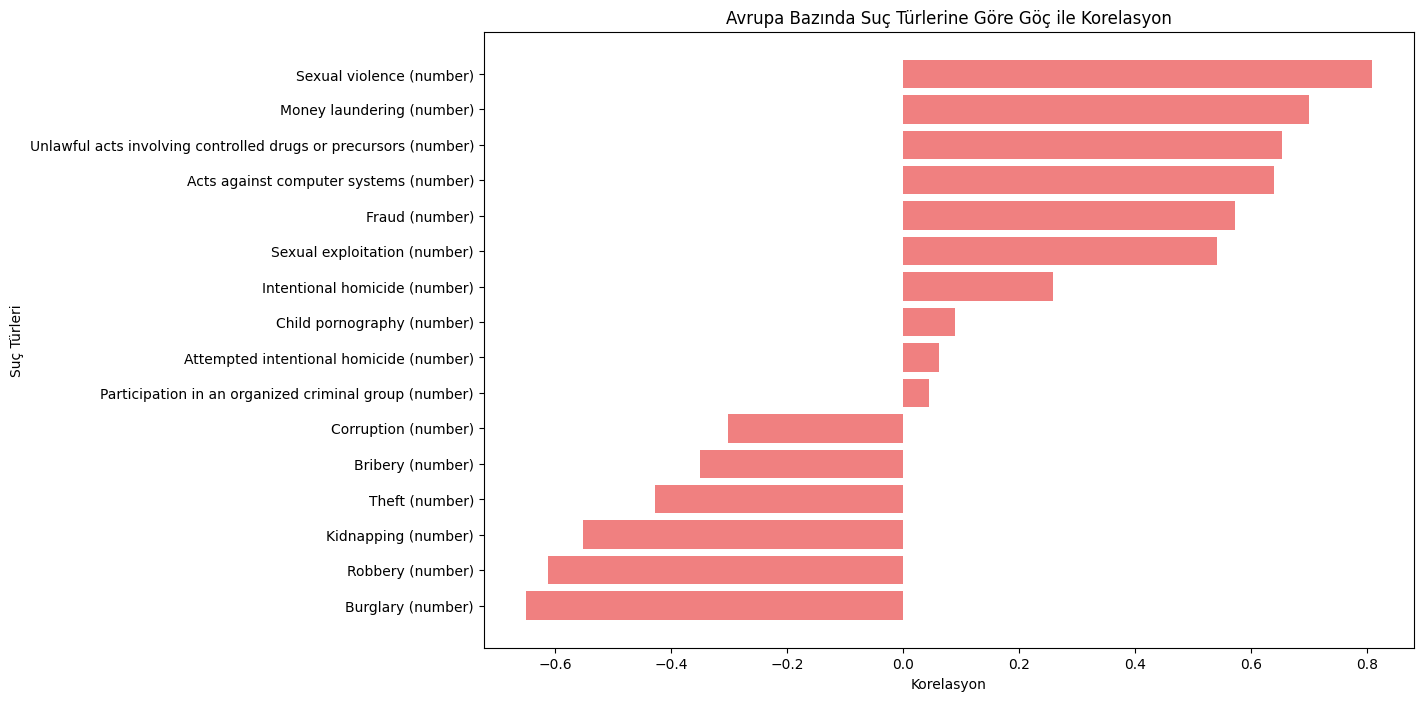

In [206]:

# Suç türlerine göre korelasyon
correlations_europe = {}

# Sadece "number" metrikli suç türlerini seç
crime_columns = [col for col in europe_total.columns if "(number)" in col]

# Her suç türü için toplam göç ile korelasyonu hesapla
for crime in crime_columns:
    corr = europe_total[crime].corr(europe_total['Migration Data'])
    correlations_europe[crime] = corr

# Korelasyonları büyükten küçüğe sıralama
sorted_europe_correlations = sorted(correlations_europe.items(), key=lambda x: x[1], reverse=True)

# Sıralanmış korelasyonları yazdır
print("Avrupa Bazında Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):")
for crime, corr_value in sorted_europe_correlations:
    print(f"{crime}: {corr_value}")
# Bar Grafiği ile Görselleştirme
crimes, corr_values = zip(*sorted_europe_correlations)  # Sıralanmış veriyi ayır
plt.figure(figsize=(12, 8))
plt.barh(crimes, corr_values, color='lightcoral')
plt.xlabel("Korelasyon")
plt.ylabel("Suç Türleri")
plt.title("Avrupa Bazında Suç Türlerine Göre Göç ile Korelasyon")
plt.gca().invert_yaxis()  # Büyükten küçüğe sıralama için
plt.show()

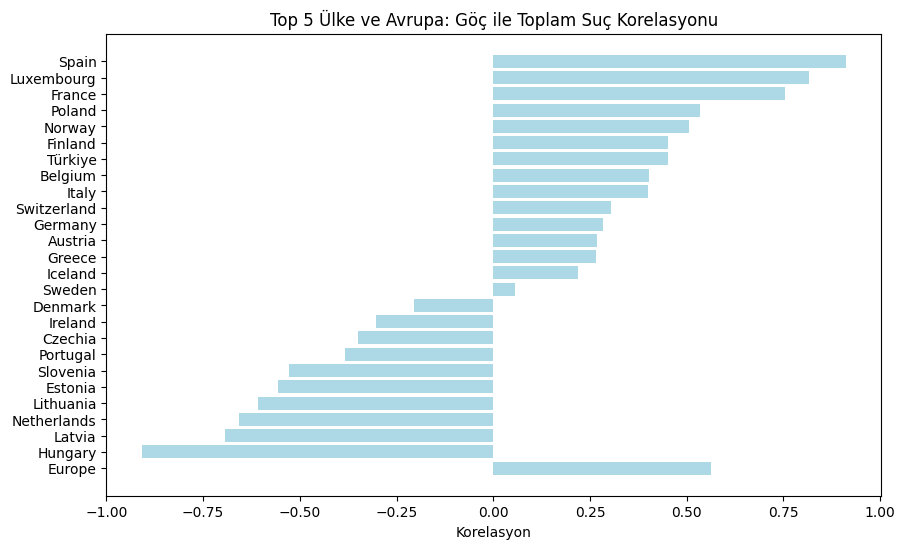

In [207]:
import matplotlib.pyplot as plt

# Ülke bazında korelasyonu hesapla
correlations = {}
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    if len(country_data) > 1:
        corr = country_data['Migration Data'].corr(country_data['Total Crimes number'])
        correlations[country] = corr

# Top 5 ülke ve Avrupa toplam korelasyon
top_5_countries = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
top_5_countries.append(("Europe", merged_df.groupby("Year")['Migration Data'].sum().corr(
    merged_df.groupby("Year")['Total Crimes number'].sum())))

# Bar Chart
countries, corr_values = zip(*top_5_countries)
plt.figure(figsize=(10, 6))
plt.barh(countries, corr_values, color='lightblue')
plt.xlabel("Korelasyon")
plt.title("Top 5 Ülke ve Avrupa: Göç ile Toplam Suç Korelasyonu")
plt.gca().invert_yaxis()
plt.show()


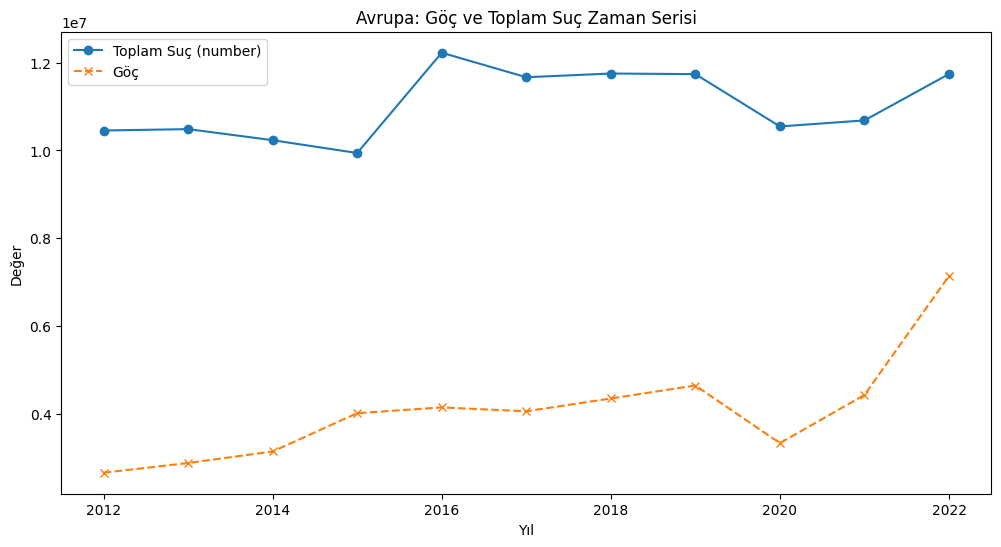

In [208]:
# Avrupa için yıllık toplam verileri hesapla
europe_data = merged_df.groupby("Year").sum(numeric_only=True)

# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(europe_data.index, europe_data['Total Crimes number'], label="Toplam Suç (number)", marker='o')
plt.plot(europe_data.index, europe_data['Migration Data'], label="Göç", linestyle="--", marker='x')
plt.title("Avrupa: Göç ve Toplam Suç Zaman Serisi")
plt.xlabel("Yıl")
plt.ylabel("Değer")
plt.legend()
plt.show()


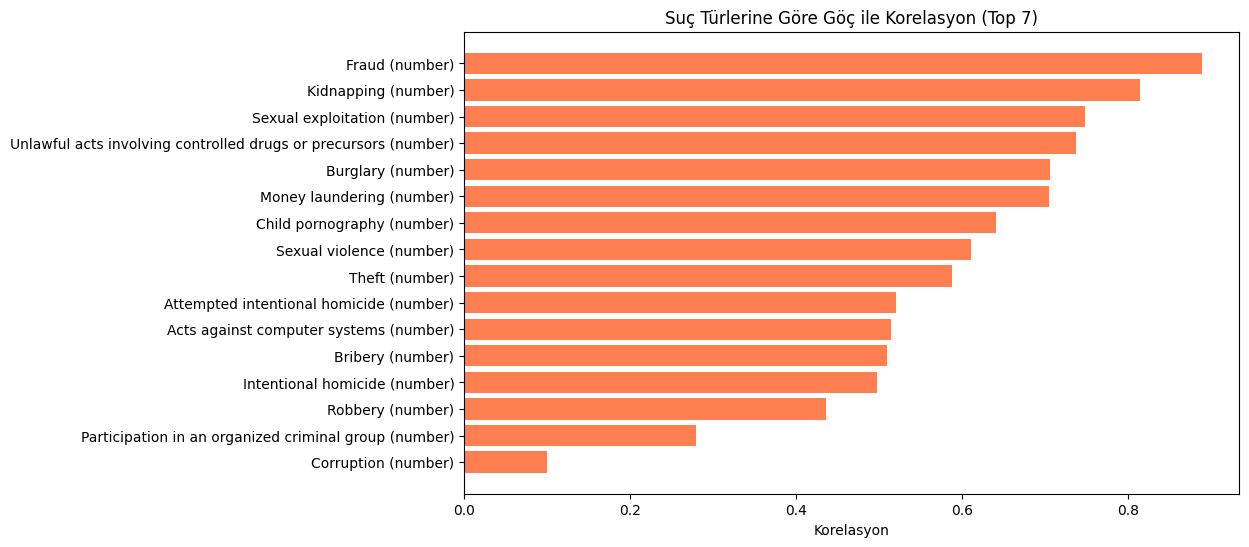

In [209]:
# Suç türlerine göre korelasyonu hesapla
crime_correlations = {}
crime_columns = [col for col in merged_df.columns if "(number)" in col]
for crime in crime_columns:
    crime_correlations[crime] = merged_df[crime].corr(merged_df['Migration Data'])

# En yüksek korelasyonlu 7 suç türü
top_7_crimes = sorted(crime_correlations.items(), key=lambda x: x[1], reverse=True)

# Bar Chart
crimes, corr_values = zip(*top_7_crimes)
plt.figure(figsize=(10, 6))
plt.barh(crimes, corr_values, color='coral')
plt.xlabel("Korelasyon")
plt.title("Suç Türlerine Göre Göç ile Korelasyon (Top 7)")
plt.gca().invert_yaxis()
plt.show()


d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWa

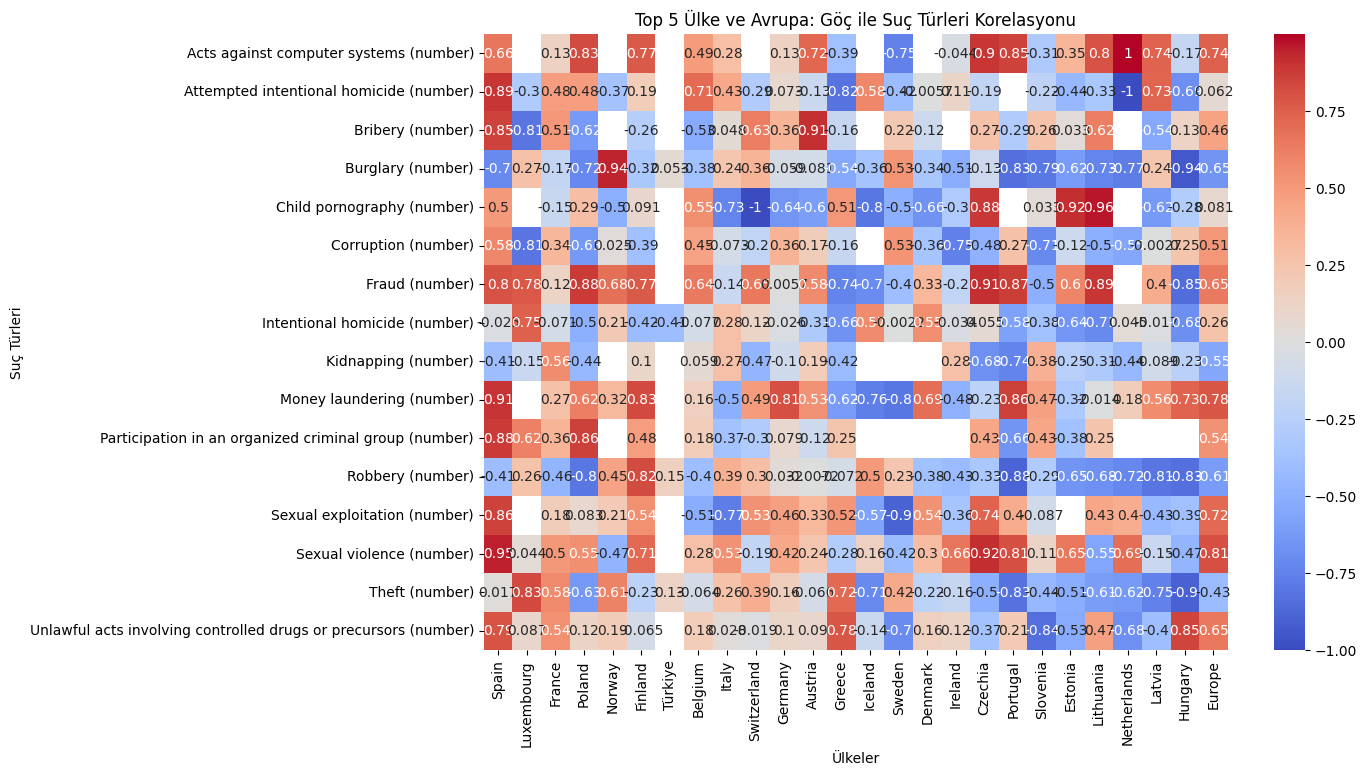

In [210]:
import seaborn as sns

# Korelasyonları hesapla (Top 5 Ülke + Avrupa)
countries = [country for country, _ in top_5_countries]
heatmap_data = pd.DataFrame(index=crime_columns)

for country in countries:
    if country == "Europe":
        europe_crime_data = merged_df.groupby("Year").sum(numeric_only=True)
        for crime in crime_columns:
            heatmap_data.loc[crime, country] = europe_crime_data[crime].corr(europe_crime_data['Migration Data'])
    else:
        country_data = merged_df[merged_df['Country'] == country]
        for crime in crime_columns:
            heatmap_data.loc[crime, country] = country_data[crime].corr(country_data['Migration Data'])

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
plt.title("Top 5 Ülke ve Avrupa: Göç ile Suç Türleri Korelasyonu")
plt.xlabel("Ülkeler")
plt.ylabel("Suç Türleri")
plt.show()


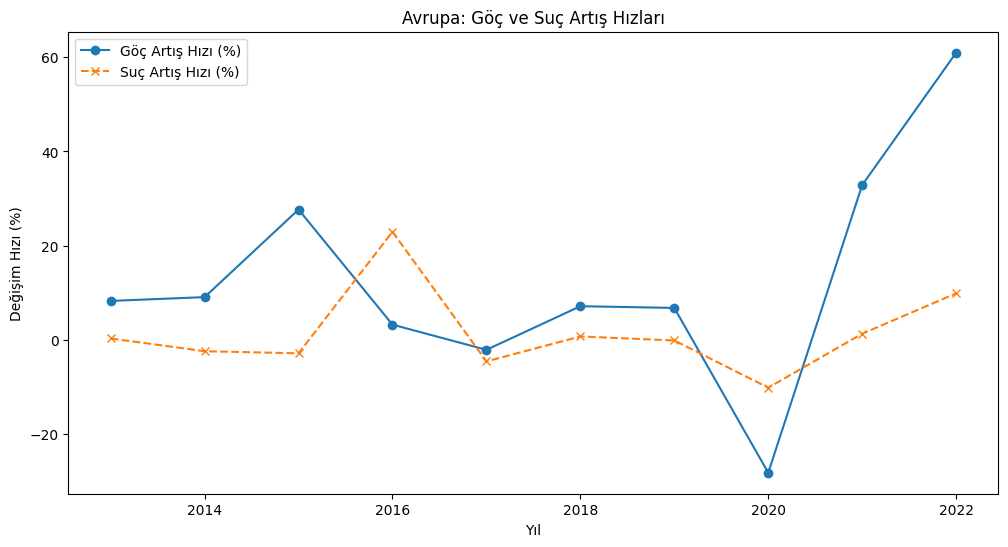

In [211]:
# Avrupa için yıllık değişim hızlarını hesapla
europe_data['Migration Growth Rate'] = europe_data['Migration Data'].pct_change() * 100
europe_data['Crime Growth Rate'] = europe_data['Total Crimes number'].pct_change() * 100

# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(europe_data.index, europe_data['Migration Growth Rate'], label="Göç Artış Hızı (%)", marker='o')
plt.plot(europe_data.index, europe_data['Crime Growth Rate'], label="Suç Artış Hızı (%)", linestyle="--", marker='x')
plt.title("Avrupa: Göç ve Suç Artış Hızları")
plt.xlabel("Yıl")
plt.ylabel("Değişim Hızı (%)")
plt.legend()
plt.show()


d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\Emin\PythonProjects\DsProje\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


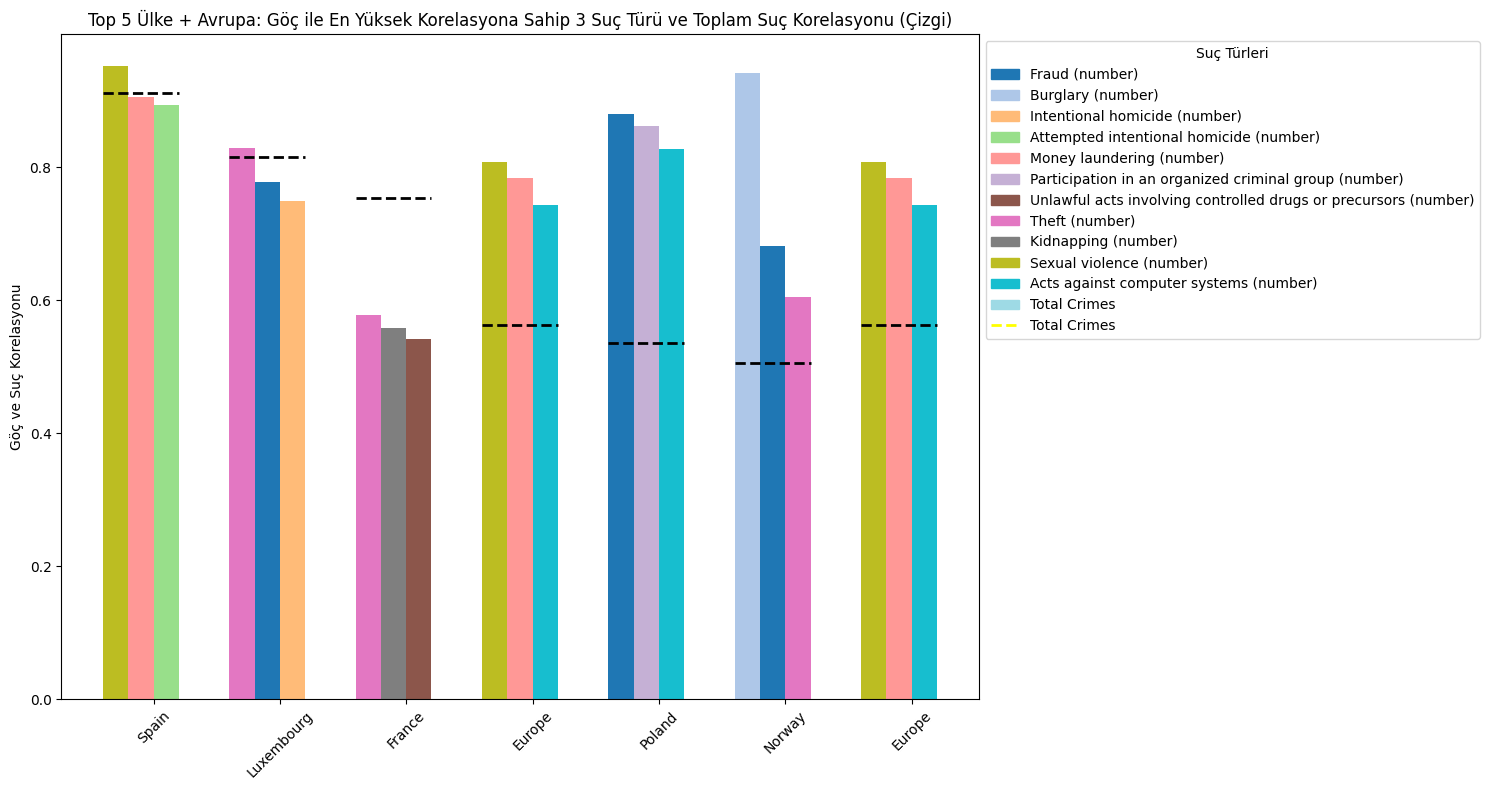

In [212]:
import matplotlib.pyplot as plt
import numpy as np

# Ülke bazında toplam korelasyon hesapla
correlations = {}
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    if len(country_data) > 1:
        corr = country_data['Migration Data'].corr(country_data['Total Crimes number'])
        correlations[country] = corr

# Avrupa için toplam korelasyonu ekle
europe_total_corr = merged_df.groupby("Year")['Migration Data'].sum().corr(
    merged_df.groupby("Year")['Total Crimes number'].sum()
)
correlations["Europe"] = europe_total_corr

# En yüksek korelasyona sahip top 5 ülke + Avrupa
top_countries = sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:6]  # Avrupa dahil 6 ülke
countries = [country for country, _ in top_countries]
countries.append("Europe")  # Avrupa'yı manuel olarak ekle

# Suç türlerine göre korelasyon katkısı hesapla
crime_columns = [col for col in merged_df.columns if "(number)" in col]
grouped_data = {}

for country in countries:
    if country == "Europe":
        europe_data = merged_df.groupby("Year").sum(numeric_only=True)
        contributions = {crime: europe_data[crime].corr(europe_data['Migration Data']) for crime in crime_columns}
        total_corr = europe_total_corr
    else:
        country_data = merged_df[merged_df['Country'] == country]
        contributions = {crime: country_data[crime].corr(country_data['Migration Data']) for crime in crime_columns}
        total_corr = correlations[country]
    
    # Sadece NaN olmayanları al ve en yüksek 3 korelasyona sahip suç türlerini seç
    contributions = {crime: value for crime, value in contributions.items() if not pd.isna(value)}
    top_3_contributions = sorted(contributions.items(), key=lambda x: x[1], reverse=True)[:3]
    
    # Toplam suç korelasyonunu ekle
    grouped_data[country] = dict(top_3_contributions)
    grouped_data[country]["Total Crimes"] = total_corr

# Benzersiz suç türlerini bul ve renk haritası oluştur
unique_crimes = set(crime for contributions in grouped_data.values() for crime in contributions.keys())
color_map = {crime: color for crime, color in zip(unique_crimes, plt.cm.tab20(np.linspace(0, 1, len(unique_crimes))))}

# Grafik için ayarlar
num_countries = len(countries)
bar_width = 0.2  # Bar genişliği
bar_positions = np.arange(num_countries)

# Grafik
plt.figure(figsize=(15, 8))

# Barlar
for i, country in enumerate(countries):
    for j, (crime, value) in enumerate(grouped_data[country].items()):
        if crime != "Total Crimes":
            plt.bar(
                bar_positions[i] + j * bar_width - (1.5 * bar_width),  # Ortalanmış yerleştirme
                value, 
                bar_width, 
                label=crime if i == 0 else "", 
                color=color_map[crime]
            )

# Toplam suç çizgisi
for i, country in enumerate(countries):
    total_corr = grouped_data[country]["Total Crimes"]
    plt.plot(
        [bar_positions[i] - bar_width * 2, bar_positions[i] + bar_width * 1],  # Çizgi pozisyonları
        [total_corr, total_corr],  # Çizgi seviyesi
        color='black', 
        linestyle='--', 
        linewidth=2, 
        label="Total Crimes" if i == 0 else ""
    )

# Legend için benzersiz suç türlerini ekle
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[crime]) for crime in unique_crimes] + [plt.Line2D([0], [0], color='yellow', linestyle='--', linewidth=2)]
labels = list(unique_crimes) + ["Total Crimes"]
plt.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1), title="Suç Türleri")

# Ayarlar
plt.xticks(bar_positions, countries, rotation=45)
plt.ylabel("Göç ve Suç Korelasyonu")
plt.title("Top 5 Ülke + Avrupa: Göç ile En Yüksek Korelasyona Sahip 3 Suç Türü ve Toplam Suç Korelasyonu (Çizgi)")
plt.tight_layout()
plt.show()
